In [24]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
img = cv2.imread('./test_images/Xxxtentacion2.jpg')
img.shape

(935, 748, 3)

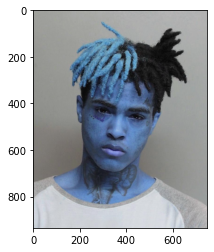

In [26]:
plt.imshow(img)

In [28]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
 

(935, 748)

In [33]:
gray


array([[160, 161, 161, ..., 180, 179, 177],
       [159, 160, 160, ..., 181, 180, 179],
       [157, 159, 159, ..., 180, 179, 179],
       ...,
       [185, 188, 192, ..., 184, 179, 172],
       [182, 185, 188, ..., 181, 175, 168],
       [182, 184, 186, ..., 179, 172, 165]], dtype=uint8)

In [34]:
img = cv2.imread('Xxxtentacion2.jpg.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('haarcascades\haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 2)
print('Number of detected faces:', len(faces))\
for (x,y,w,h) in faces:
   cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
cv2.imshow('Face Detection',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

SyntaxError: invalid syntax (<ipython-input-34-aafb270a9225>, line 6)

In [37]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[180, 311, 361, 361]])

In [38]:
(x,y,w,h) = faces[0]
x,y,w,h

(180, 311, 361, 361)

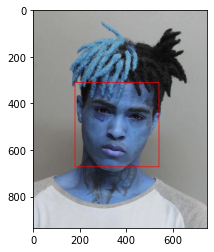

In [39]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

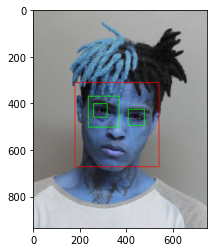

In [40]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

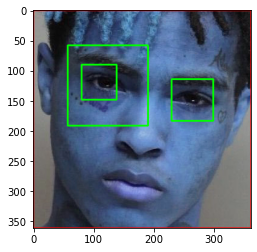

In [41]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')


In [43]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [44]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [45]:
img_dirs

['./dataset/hugh_jackman',
 './dataset/johnny_depp',
 './dataset/robert_downey',
 './dataset/Sandra Bullock',
 './dataset/scarlett_johansson',
 './dataset/tom_cruise',
 './dataset/virat_kohli',
 './dataset/will_smith']

In [46]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [63]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/johnny_depp
Generating cropped images in folder:  ./dataset/cropped/robert_downey
Generating cropped images in folder:  ./dataset/cropped/Sandra Bullock
Generating cropped images in folder:  ./dataset/cropped/scarlett_johansson
Generating cropped images in folder:  ./dataset/cropped/tom_cruise
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
Generating cropped images in folder:  ./dataset/cropped/will_smith


In [58]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [70]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

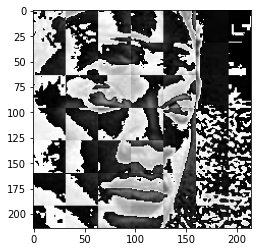

In [73]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [72]:
cropped_image = np.array(roi_color)
cropped_image.shape

(214, 214, 3)

In [74]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

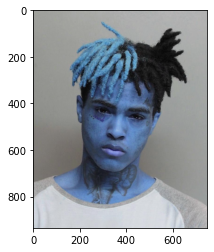

In [78]:
original_image = cv2.imread('./test_images/Xxxtentacion2.jpg')
plt.imshow(original_image)

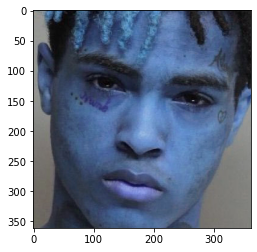

In [80]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Xxxtentacion2.jpg')
plt.imshow(cropped_image)

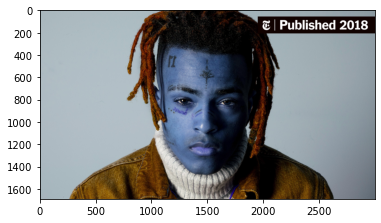

In [82]:
org_image_obstructed = cv2.imread('./test_images/Xxxtentacion3.jpg')
plt.imshow(org_image_obstructed)

In [83]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/Xxxtentacion3.jpg')
cropped_image_no_2_eyes

array([[[ 99,  35,   4],
        [ 84,  19,   4],
        [ 69,   5,   0],
        ...,
        [ 94,  34,   4],
        [ 92,  35,   4],
        [102,  43,  11]],

       [[103,  38,   7],
        [ 92,  24,   5],
        [ 78,  11,   0],
        ...,
        [ 91,  31,   1],
        [ 89,  26,   0],
        [105,  40,   9]],

       [[113,  43,  13],
        [113,  41,  17],
        [102,  32,   9],
        ...,
        [ 95,  32,   4],
        [ 89,  22,   0],
        [106,  36,   6]],

       ...,

       [[109,  66,  23],
        [121,  78,  29],
        [138,  96,  43],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[100,  49,   6],
        [103,  58,  14],
        [119,  76,  27],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 97,  45,   0],
        [ 93,  46,   2],
        [ 94,  52,   7],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [84]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [85]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [86]:
img_dirs


['./dataset/cropped',
 './dataset/hugh_jackman',
 './dataset/johnny_depp',
 './dataset/robert_downey',
 './dataset/Sandra Bullock',
 './dataset/scarlett_johansson',
 './dataset/tom_cruise',
 './dataset/virat_kohli',
 './dataset/will_smith']

In [87]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [88]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/hugh_jackman
Generating cropped images in folder:  ./dataset/cropped/johnny_depp
Generating cropped images in folder:  ./dataset/cropped/robert_downey
Generating cropped images in folder:  ./dataset/cropped/Sandra Bullock
Generating cropped images in folder:  ./dataset/cropped/scarlett_johansson
Generating cropped images in folder:  ./dataset/cropped/tom_cruise
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
Generating cropped images in folder:  ./dataset/cropped/will_smith


In [89]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'hugh_jackman': ['./dataset/cropped/hugh_jackman\\hugh_jackman1.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman10.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman11.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman12.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman13.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman14.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman15.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman16.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman17.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman18.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman19.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman2.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman20.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman21.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman22.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman23.png',
  './dataset/cropped/hugh_jackman\\hugh_jackman24.png',
  './dataset/cropped/hugh_jackman\

In [90]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'hugh_jackman': 0,
 'johnny_depp': 1,
 'robert_downey': 2,
 'Sandra Bullock': 3,
 'scarlett_johansson': 4,
 'tom_cruise': 5,
 'virat_kohli': 6,
 'will_smith': 7}

In [91]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [92]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(588, 4096)

In [93]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7346938775510204

In [97]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.65      0.72      0.68        18
           1       0.50      0.54      0.52        13
           2       0.42      0.42      0.42        12
           3       0.89      0.71      0.79        24
           4       0.82      0.98      0.89        43
           5       0.75      0.92      0.83        13
           6       1.00      0.33      0.50        12
           7       0.73      0.67      0.70        12

    accuracy                           0.73       147
   macro avg       0.72      0.66      0.67       147
weighted avg       0.75      0.73      0.72       147



In [98]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [99]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [100]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score  \
0                  svm    0.707431   
1        random_forest    0.473851   
2  logistic_regression    0.739173   

                                    best_params  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 10}  
2                  {'logisticregression__C': 1}

In [101]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [102]:
best_estimators['svm'].score(X_test,y_test)

0.7959183673469388

In [103]:
best_estimators['random_forest'].score(X_test,y_test)

0.6122448979591837

In [104]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8095238095238095

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[16,  0,  0,  0,  1,  1,  0,  0],
       [ 1,  8,  3,  1,  0,  0,  0,  0],
       [ 1,  2,  7,  0,  0,  1,  1,  0],
       [ 0,  0,  1, 18,  4,  1,  0,  0],
       [ 0,  0,  2,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 12,  0,  0],
       [ 5,  0,  0,  0,  1,  0,  6,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  9]], dtype=int64)

In [106]:
best_clf = best_estimators['svm']

Text(69.0, 0.5, 'Truth')

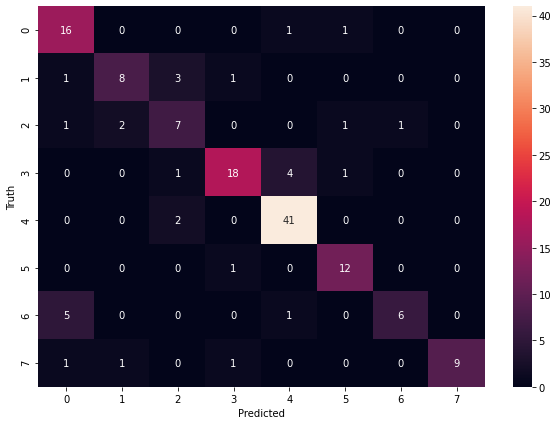

In [108]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [109]:
class_dict

{'hugh_jackman': 0,
 'johnny_depp': 1,
 'robert_downey': 2,
 'Sandra Bullock': 3,
 'scarlett_johansson': 4,
 'tom_cruise': 5,
 'virat_kohli': 6,
 'will_smith': 7}

In [110]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [111]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))